In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Colormap 
n_species = 2
cmap = plt.get_cmap('Spectral',n_species)  # You can choose any colormap, e.g., 'plasma', 'jet', 'coolwarm', etc.
colors = cmap(np.linspace(0, 1, n_species)) 

# Set default figure size
plt.rcParams['figure.figsize'] = [10,10]
# Set default font size
plt.rcParams['font.size'] = 15
# Set default axis label size
plt.rcParams['axes.labelsize'] = 20
# Set default tick label size
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
# Set default legend size
plt.rcParams['legend.fontsize'] = 10
# Set default figure title size
plt.rcParams['figure.titlesize'] = 20

from pattern_analysis_functions_giulia import *

def _create_chessboard(nx, ny, ds):
    """Create centered chessboard pattern with square size ds."""
    x = np.arange(nx) - nx // 2
    y = np.arange(ny) - ny // 2
    xx, yy = np.meshgrid(x, y, indexing='ij')
    return ((xx // ds) + (yy // ds)) % 2

def calc_assortment_scores(im, window_sizes):
    '''
    Calculate assortment scores for focal species in image im over specified window sizes.
    
    Parameters:
    -----------
    im : np.ndarray
        2D array with species labels
    window_sizes : list of int
        List of window sizes for calculating assortment scores  
    Returns:
    --------
    mean_assortment : np.ndarray
        Mean assortment scores for each window size
    std_assortment : np.ndarray
        Standard deviation of assortment scores for each window size
    
    '''

    focal_type = 1 # Define index of focal species type
    other_type = 0 # Define index of non-focal species type

    # Calculate global frequency of focal species
    N_focal_G = np.sum(im == focal_type)
    N_other_G = np.sum(im == other_type)
    f_focal = N_focal_G / (N_focal_G + N_other_G)

    # Loop over all cells to calculate assortment scores
    nx, ny = im.shape
    assortment_scores = []
    for i in range(nx):
        for j in range(ny):
            if im[i,j] == focal_type:
                assortment_cell = np.empty(len(window_sizes))
                for idx, window_size in enumerate(window_sizes):
                    x0 = max(0, i - window_size)
                    x1 = min(nx, i + window_size + 1)
                    y0 = max(0, j - window_size)
                    y1 = min(ny, j + window_size + 1)

                    # calculate segregation score of focal cell
                    local_window = im[x0:x1, y0:y1]
                    N_focal_L = np.sum(local_window == focal_type) 
                    num_other  = np.sum(local_window == other_type)
                    seg_cell = (N_focal_L-num_other) / (N_focal_L+num_other)

                    # calculate assortment score of focal cell
                    assortment_cell[idx] = (seg_cell - f_focal) / (1 - f_focal)

                assortment_scores.append(assortment_cell)

    # Compute mean and std of assortment scores
    assortment_scores = np.array(assortment_scores)
    mean_assortment = np.mean(assortment_scores, axis=0)
    std_assortment = np.std(assortment_scores, axis=0)

    return (mean_assortment, std_assortment)

def calc_segregation_scores(im, window_sizes):
    '''
    Calculate segregation scores for focal species in image im over specified window sizes.
    
    Parameters:
    -----------
    im : np.ndarray
        2D array with species labels
    window_sizes : list of int
        List of window sizes for calculating segregation scores  
    Returns:
    --------
    mean_segregation : np.ndarray
        Mean segregation scores for each window size
    std_segregation : np.ndarray
        Standard deviation of segregation scores for each window size
    
    '''

    focal_type = 1 # Define index of focal species type
    other_type = 0 # Define index of non-focal species type

    # Calculate global frequency of focal species
    N_focal_G = np.sum(im == focal_type)
    N_other_G = np.sum(im == other_type)
    f_focal = N_focal_G / (N_focal_G + N_other_G)

    # Loop over all cells to calculate segregation scores
    nx, ny = im.shape
    segregation_scores = []
    for i in range(nx):
        for j in range(ny):
            if im[i,j] == focal_type:
                segregation_cell = np.empty(len(window_sizes))
                for idx, window_size in enumerate(window_sizes):
                    x0 = max(0, i - window_size)
                    x1 = min(nx, i + window_size + 1)
                    y0 = max(0, j - window_size)
                    y1 = min(ny, j + window_size + 1)

                    # calculate segregation score of focal cell
                    local_window = im[x0:x1, y0:y1]
                    N_focal_L = np.sum(local_window == focal_type) 
                    N_other_L  = np.sum(local_window == other_type)

                    #seg_cell = (N_focal_L - N_other_L) / (N_focal_L + N_other_L)

                    seg_cell = (N_focal_L/N_focal_G - N_other_L/N_other_G) / (N_focal_L/N_focal_G + N_other_L/N_other_G)

                    # calculate segregation score of focal cell
                    segregation_cell[idx] = seg_cell

                segregation_scores.append(segregation_cell)

    # Compute mean and std of segregation scores
    segregation_scores = np.array(segregation_scores)
    mean_segregation = np.mean(segregation_scores, axis=0)
    std_segregation = np.std(segregation_scores, axis=0)

    return (mean_segregation, std_segregation)

Text(0.5, 1.0, 'Example Pattern 2')

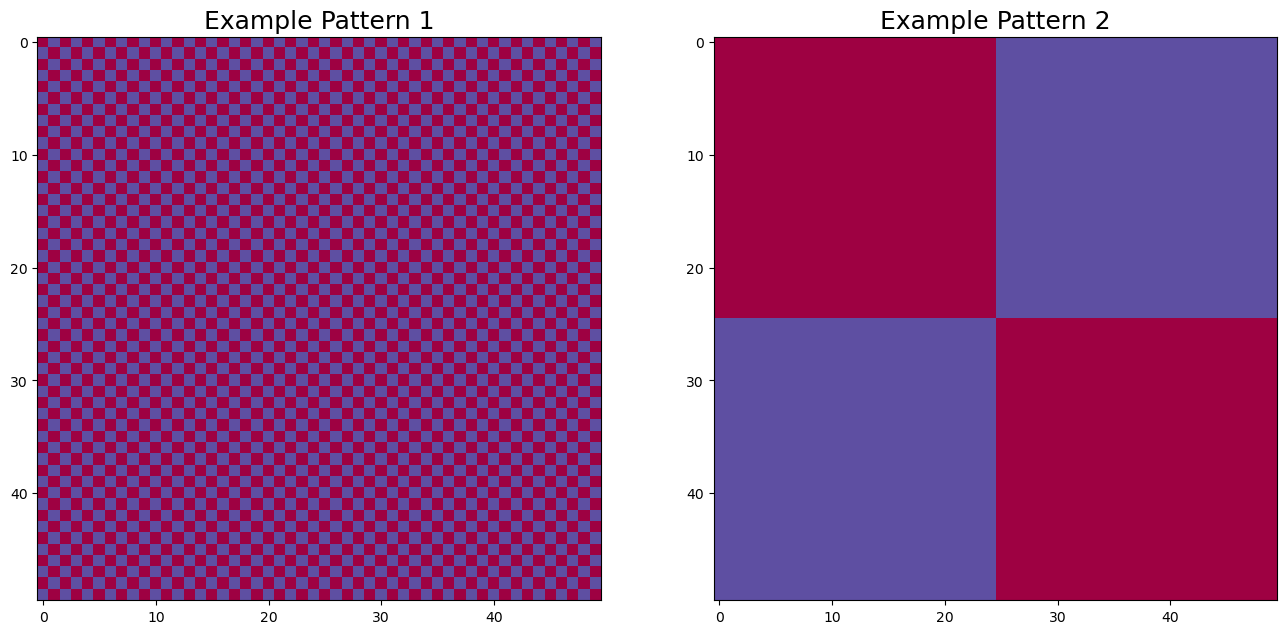

In [51]:
im1 = _create_chessboard(50, 50, 1)
im2 = _create_chessboard(50, 50, 25)

# Plot example pattern and null model
fig, ax = plt.subplots(figsize=(16,8),ncols=2)
ax[0].imshow(im1, cmap=cmap)
ax[0].set_title('Example Pattern 1')
ax[1].imshow(im2, cmap=cmap)
ax[1].set_title('Example Pattern 2')

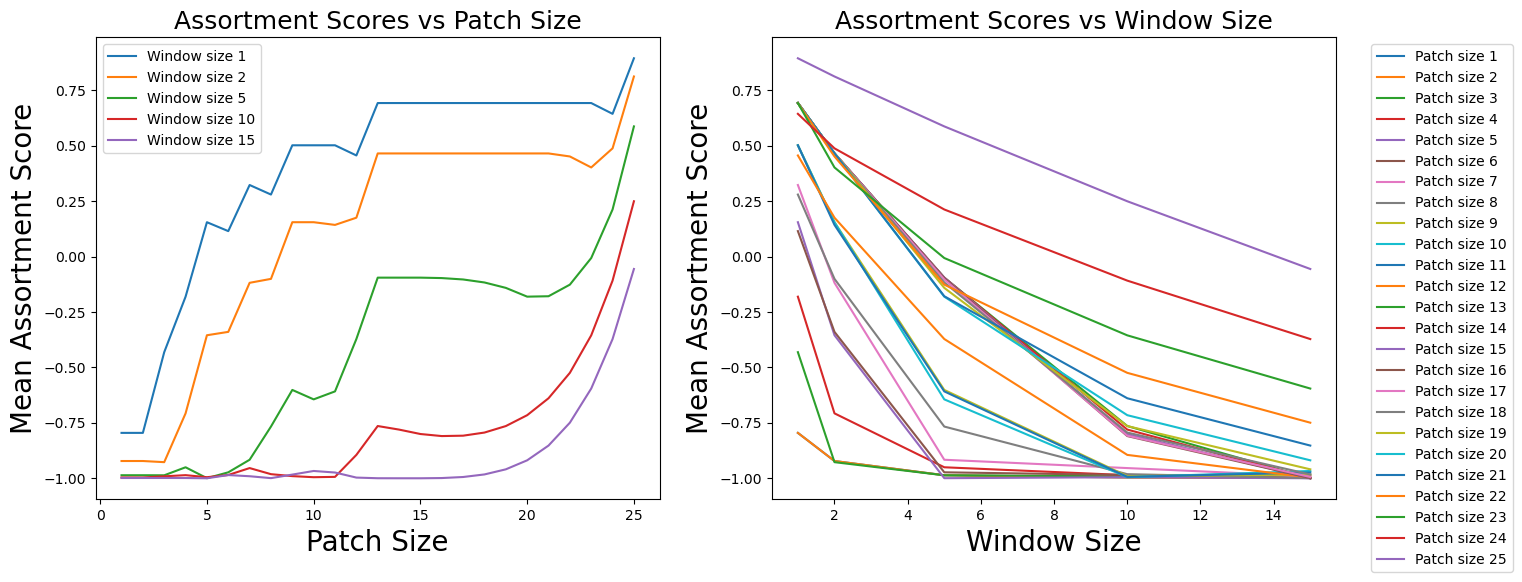

In [62]:

window_sizes = [1,2,5,10,15] 
patch_size = np.arange(1,26,1)

assortment_results = []

for p in patch_size:
    im = _create_chessboard(50, 50, p)
    mean_assortment, std_assortment = calc_assortment_scores(im, window_sizes)
    assortment_results.append(mean_assortment)

assortment_results = np.array(assortment_results)
# Plot assortment results

fig, axs =  plt.subplots(1, 2, figsize=(16,6))
for idx, w in enumerate(window_sizes):
    axs[0].plot(patch_size, assortment_results[:,idx], label=f'Window size {w}')
axs[0].set_xlabel('Patch Size')
axs[0].set_ylabel('Mean Assortment Score')
axs[0].set_title('Assortment Scores vs Patch Size')
axs[0].legend()

for idx, p in enumerate(patch_size):
    axs[1].plot(window_sizes, assortment_results[idx,:], label=f'Patch size {p}')
axs[1].set_xlabel('Window Size')
axs[1].set_ylabel('Mean Assortment Score')
axs[1].set_title('Assortment Scores vs Window Size')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

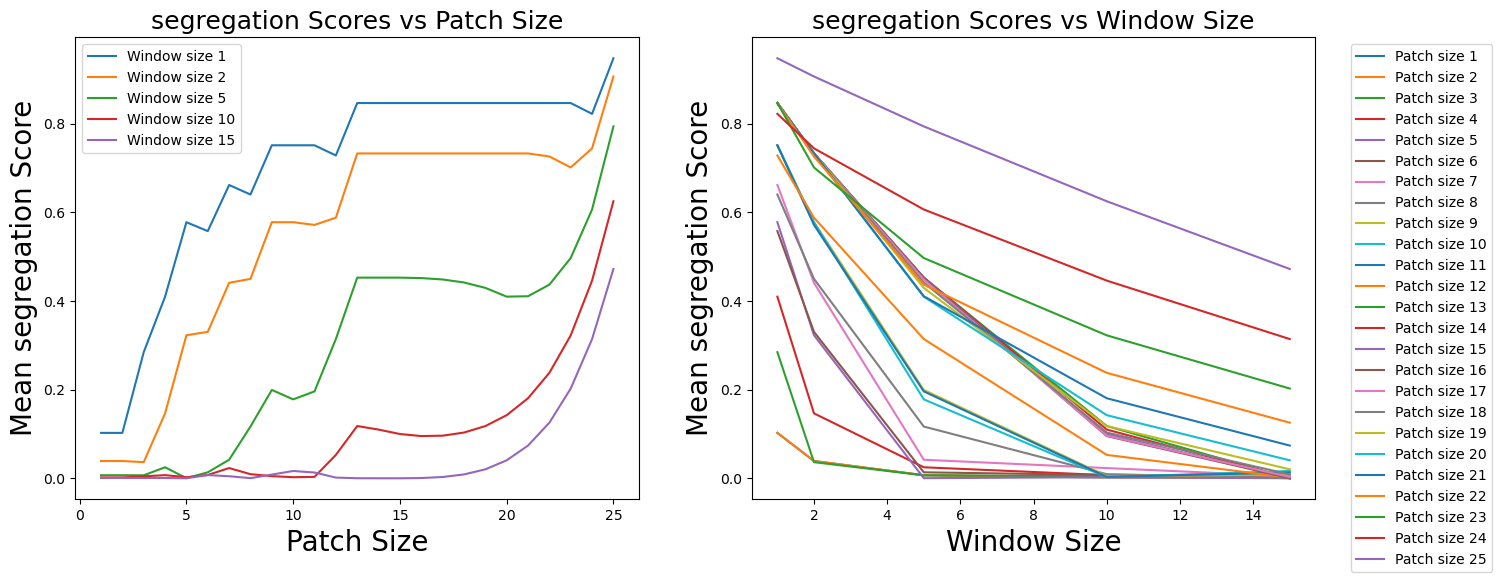

In [63]:

window_sizes = [1,2,5,10,15] 
patch_size = np.arange(1,26,1)

segregation_results = []

for p in patch_size:
    im = _create_chessboard(50, 50, p)
    mean_segregation, std_segregation = calc_segregation_scores(im, window_sizes)
    segregation_results.append(mean_segregation)

segregation_results = np.array(segregation_results)
# Plot segregation results

fig, axs =  plt.subplots(1, 2, figsize=(16,6))
for idx, w in enumerate(window_sizes):
    axs[0].plot(patch_size, segregation_results[:,idx], label=f'Window size {w}')
axs[0].set_xlabel('Patch Size')
axs[0].set_ylabel('Mean segregation Score')
axs[0].set_title('segregation Scores vs Patch Size')
axs[0].legend()

for idx, p in enumerate(patch_size):
    axs[1].plot(window_sizes, segregation_results[idx,:], label=f'Patch size {p}')
axs[1].set_xlabel('Window Size')
axs[1].set_ylabel('Mean segregation Score')
axs[1].set_title('segregation Scores vs Window Size')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()